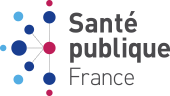

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 162)
pd.set_option('display.max_row', 162)

In [2]:
df = pd.read_csv('openfoodfacts.csv', sep=',') 

In [3]:
df.head(3)

product_name  fat_100g  sugars_100g  \
0    Bridelight 3% Les carrés fondants goût Emmental       3.0          8.5   
1                                100 % Pur Jus Pomme       0.0          9.7   
2                                  18 marrons glacés       0.8         56.0   

   energy_100g  carbohydrates_100g  saturated-fat_100g  fiber_100g  \
0        477.0                 8.5                 2.0         0.0   
1        179.0                10.0                 0.0         0.0   
2       1378.0                76.0                 0.1         4.8   

   proteins_100g  salt_100g  cat pnns            pnns_groups_1  \
0           13.0   2.000000         6  Milk and dairy products   
1            0.5   0.030000         0                Beverages   
2            0.8   0.050038         8            Sugary snacks   

  nutrition_grade_fr  
0                  C  
1                  C  
2                  C

In [4]:
df.describe()

fat_100g   sugars_100g   energy_100g  carbohydrates_100g  \
count  41976.000000  41976.000000  41976.000000        41976.000000   
mean      10.766339     11.981353    942.066154           24.555318   
std       14.621162     14.890429    742.963683           24.498819   
min        0.000000      0.000000      0.000000            0.000000   
25%        1.500000      1.667500    328.000000            7.050000   
50%        4.000000      9.000000    670.000000           11.000000   
75%       16.000000     13.000000   1506.000000           44.000000   
max      100.000000     88.700000   3770.000000           93.000000   

       saturated-fat_100g    fiber_100g  proteins_100g     salt_100g  \
count        41976.000000  41976.000000   41976.000000  41976.000000   
mean             3.900638      0.913202       7.391095      0.745441   
std              5.855618      1.759656       6.186331      0.724653   
min              0.000000      0.000000       0.000000      0.000000   
25%              0.400000      0.000000       3.000000      0.070000   
50%              1.000000      0.000000       6.750000      0.750000   
75%              4.200000      1.200000       9.000000      1.015000   
max             39.600000     11.800000      40.000000      4.800000   

           cat pnns  
count  41976.000000  
mean       3.676672  
std        3.009494  
min       -1.000000  
25%        1.000000  
50%        4.000000  
75%        6.000000  
max        8.000000

In [5]:
df.columns

Index(['product_name', 'fat_100g', 'sugars_100g', 'energy_100g',
       'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'cat pnns', 'pnns_groups_1',
       'nutrition_grade_fr'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41976 entries, 0 to 41975
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_name        41976 non-null  object 
 1   fat_100g            41976 non-null  float64
 2   sugars_100g         41976 non-null  float64
 3   energy_100g         41976 non-null  float64
 4   carbohydrates_100g  41976 non-null  float64
 5   saturated-fat_100g  41976 non-null  float64
 6   fiber_100g          41976 non-null  float64
 7   proteins_100g       41976 non-null  float64
 8   salt_100g           41976 non-null  float64
 9   cat pnns            41976 non-null  int64  
 10  pnns_groups_1       38260 non-null  object 
 11  nutrition_grade_fr  41976 non-null  object 
dtypes: float64(8), int64(1), object(3)
memory usage: 3.8+ MB


### Analyse Univariée


In [7]:
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import scipy.stats as st

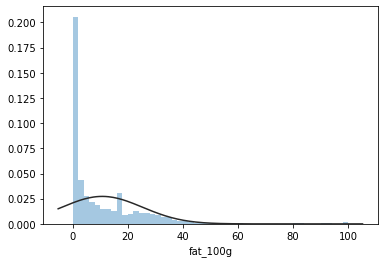

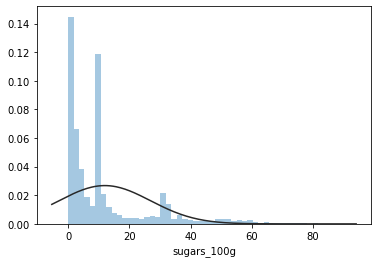

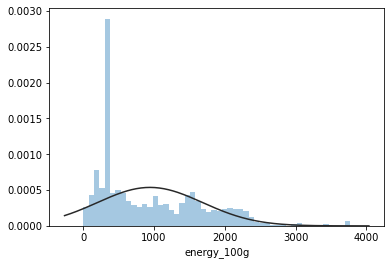

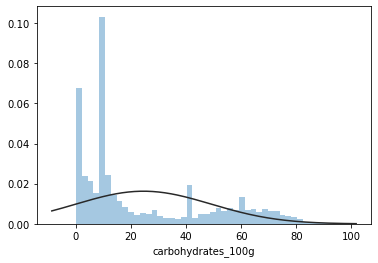

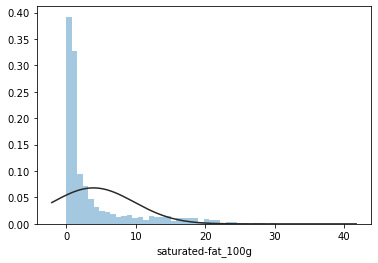

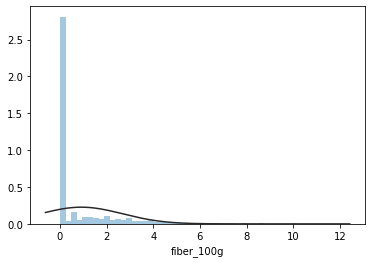

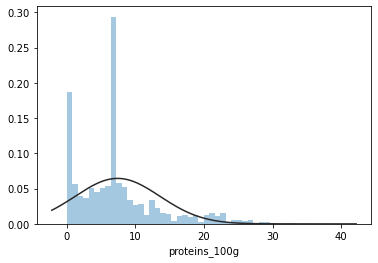

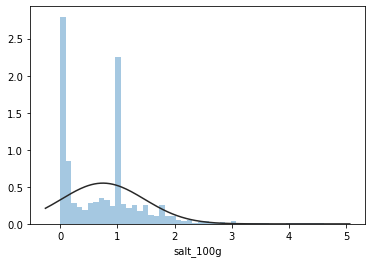

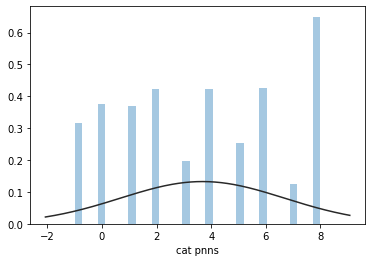

In [8]:
#distplot
for col in df.select_dtypes('number'):
    sns.distplot(df[col], fit=norm, kde=False)
    plt.show()

In [9]:
# test de normalité Shapiro-Wilk
seuil = 0.05

for col in df.select_dtypes('number'):
    w, pvalue = st.shapiro(df[col])
    print(f'{col :-<70} {w} {pvalue}')
    if pvalue > seuil:
        print("On ne peux pas rejetter H0: la distribution suit une loi normale")
    else:
        print("On rejette H0 : la distribution ne suit pas une loi normale")

fat_100g-------------------------------------------------------------- 0.712087869644165 0.0
On rejette H0 : la distribution ne suit pas une loi normale
sugars_100g----------------------------------------------------------- 0.7511260509490967 0.0
On rejette H0 : la distribution ne suit pas une loi normale
energy_100g----------------------------------------------------------- 0.8891830444335938 0.0
On rejette H0 : la distribution ne suit pas une loi normale
carbohydrates_100g---------------------------------------------------- 0.8302546739578247 0.0
On rejette H0 : la distribution ne suit pas une loi normale
saturated-fat_100g---------------------------------------------------- 0.6794923543930054 0.0
On rejette H0 : la distribution ne suit pas une loi normale
fiber_100g------------------------------------------------------------ 0.597051203250885 0.0
On rejette H0 : la distribution ne suit pas une loi normale
proteins_100g--------------------------------------------------------- 0.87528

fat_100g


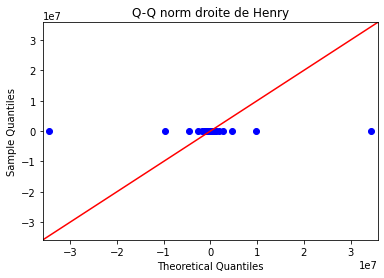

sugars_100g


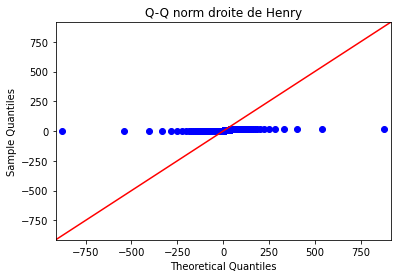

energy_100g


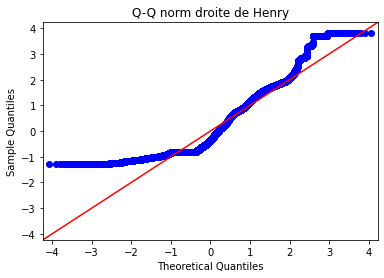

carbohydrates_100g


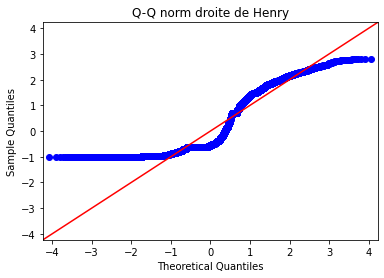

saturated-fat_100g


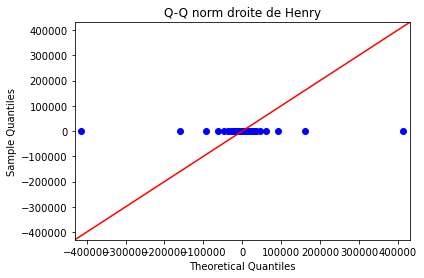

fiber_100g


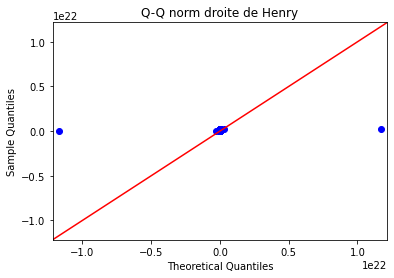

proteins_100g


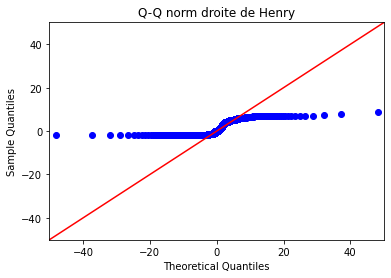

salt_100g


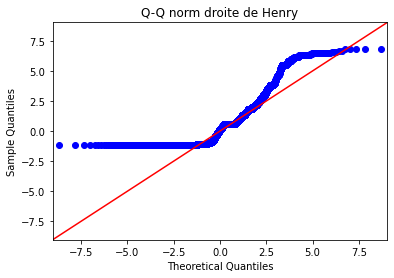

cat pnns


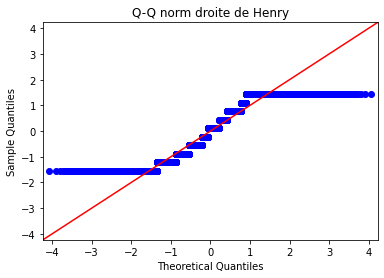

In [10]:
#qqpolot vs. loi normale (droite de Henry)
for col in df.select_dtypes('number'):
    sm.qqplot(df[col],stats.t, fit=True, line="45")
    plt.title("Q-Q norm droite de Henry")
    print(col)
    plt.show()

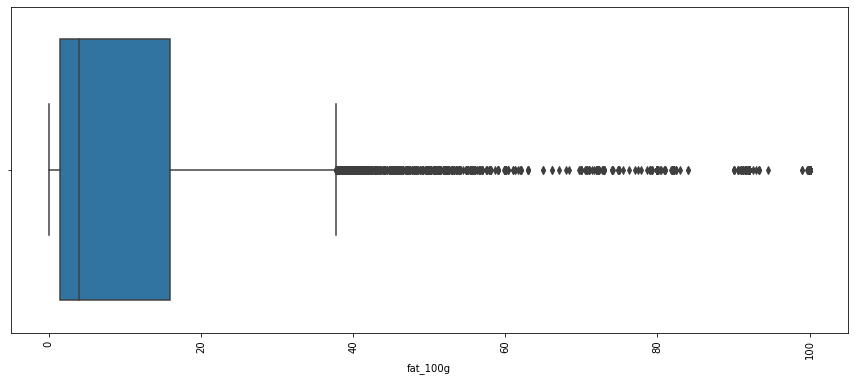

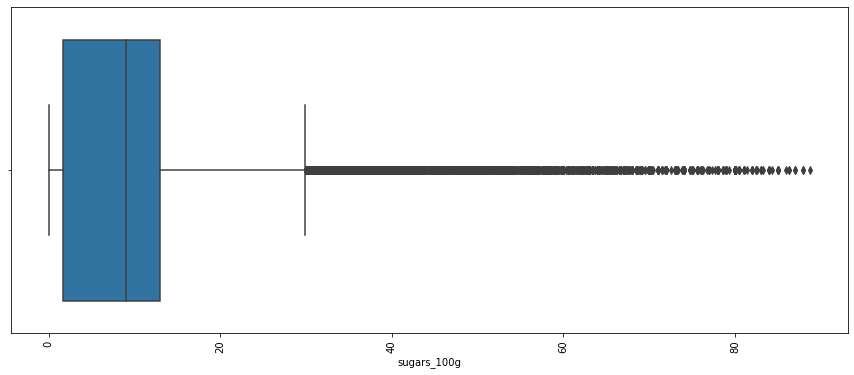

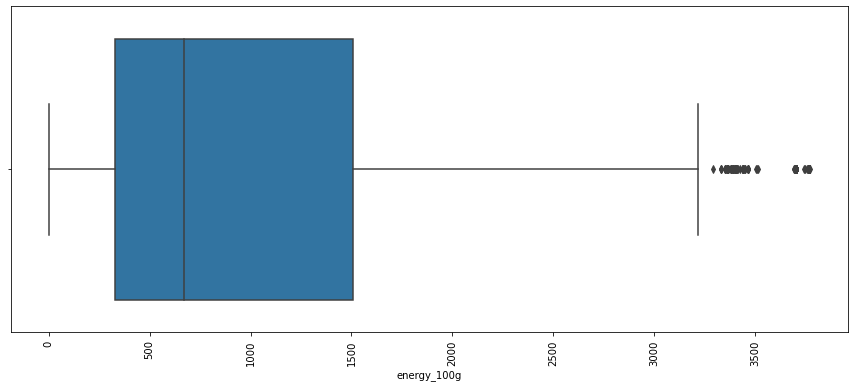

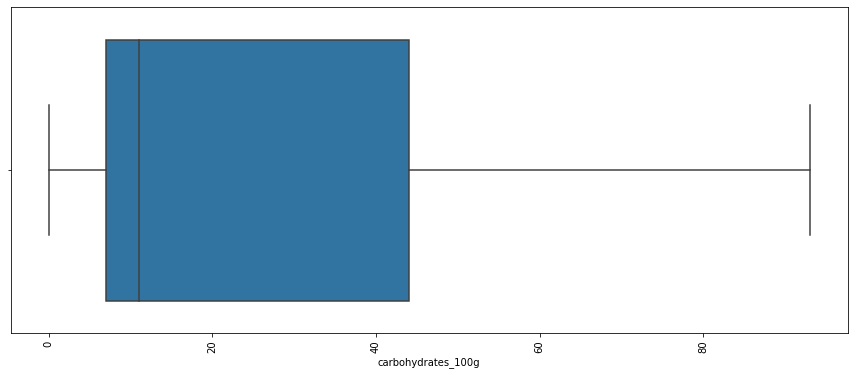

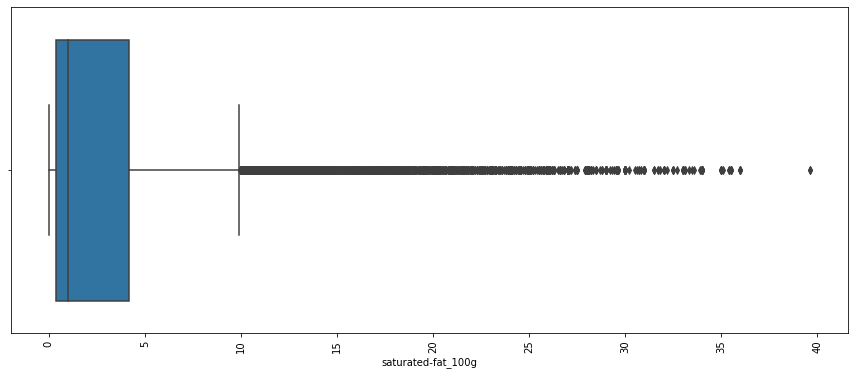

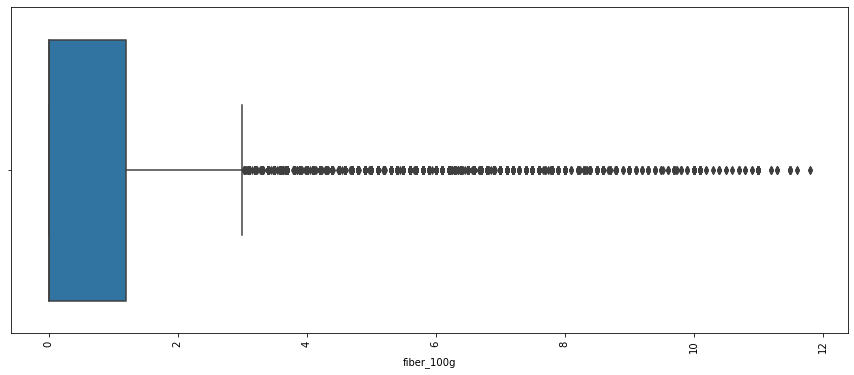

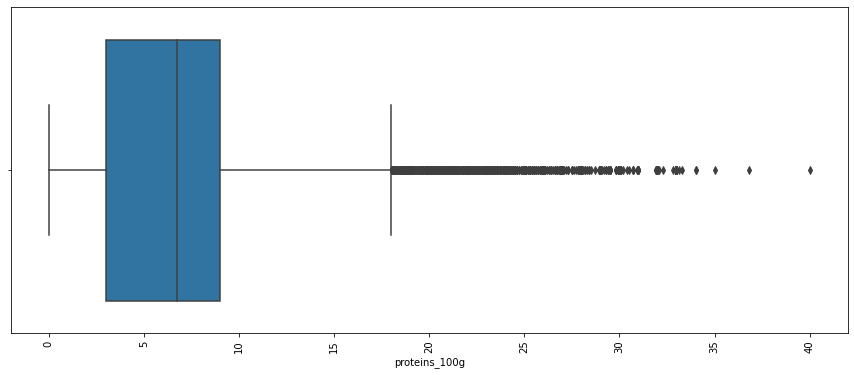

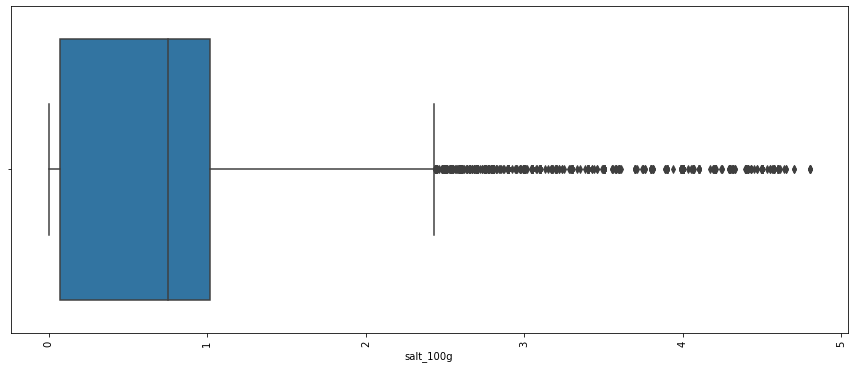

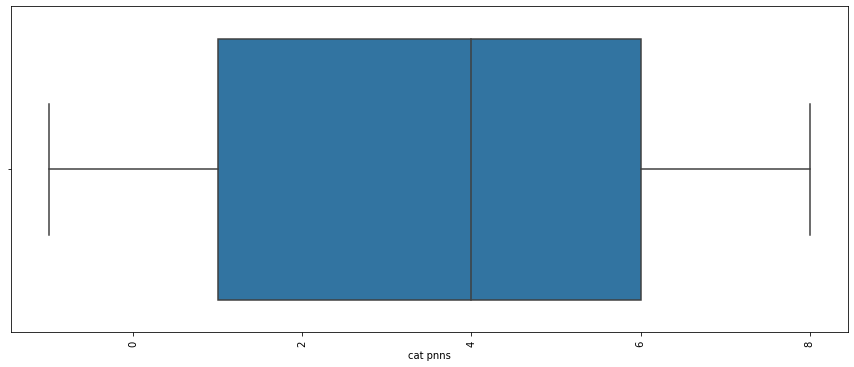

In [11]:
for col in df.select_dtypes('number'):
    plt.figure(figsize=(15,6))
    sns.boxplot(df[col])
    plt.xticks(rotation=90)
    plt.show()

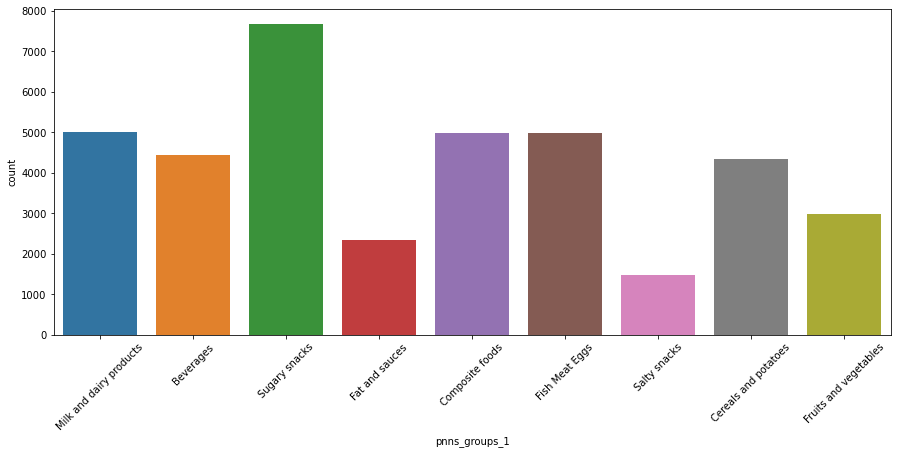

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x="pnns_groups_1",data=df)
plt.xticks(rotation=45)
plt.show()

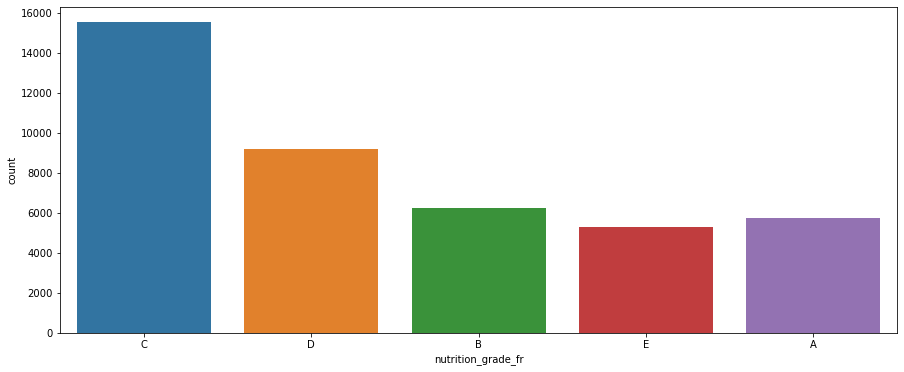

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x="nutrition_grade_fr",data=df)
plt.show()

### Analyse Bivariée

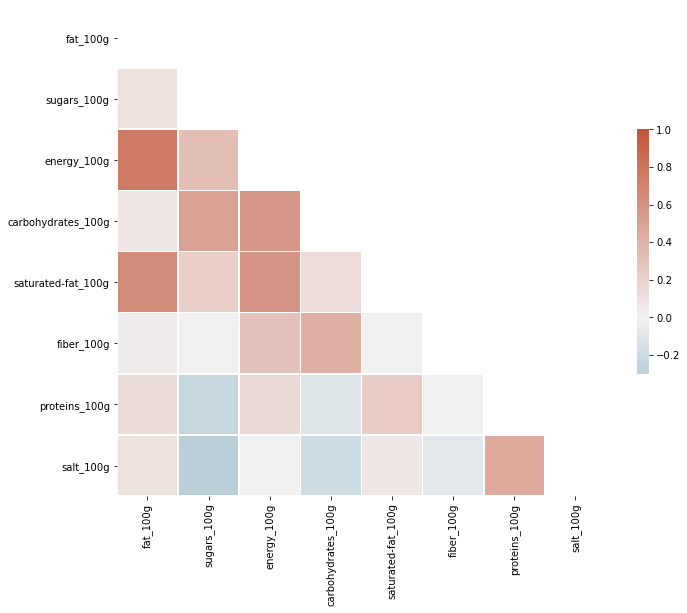

In [14]:
# Compute the correlation matrix
corr = df[['fat_100g', 'sugars_100g', 'energy_100g',
       'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

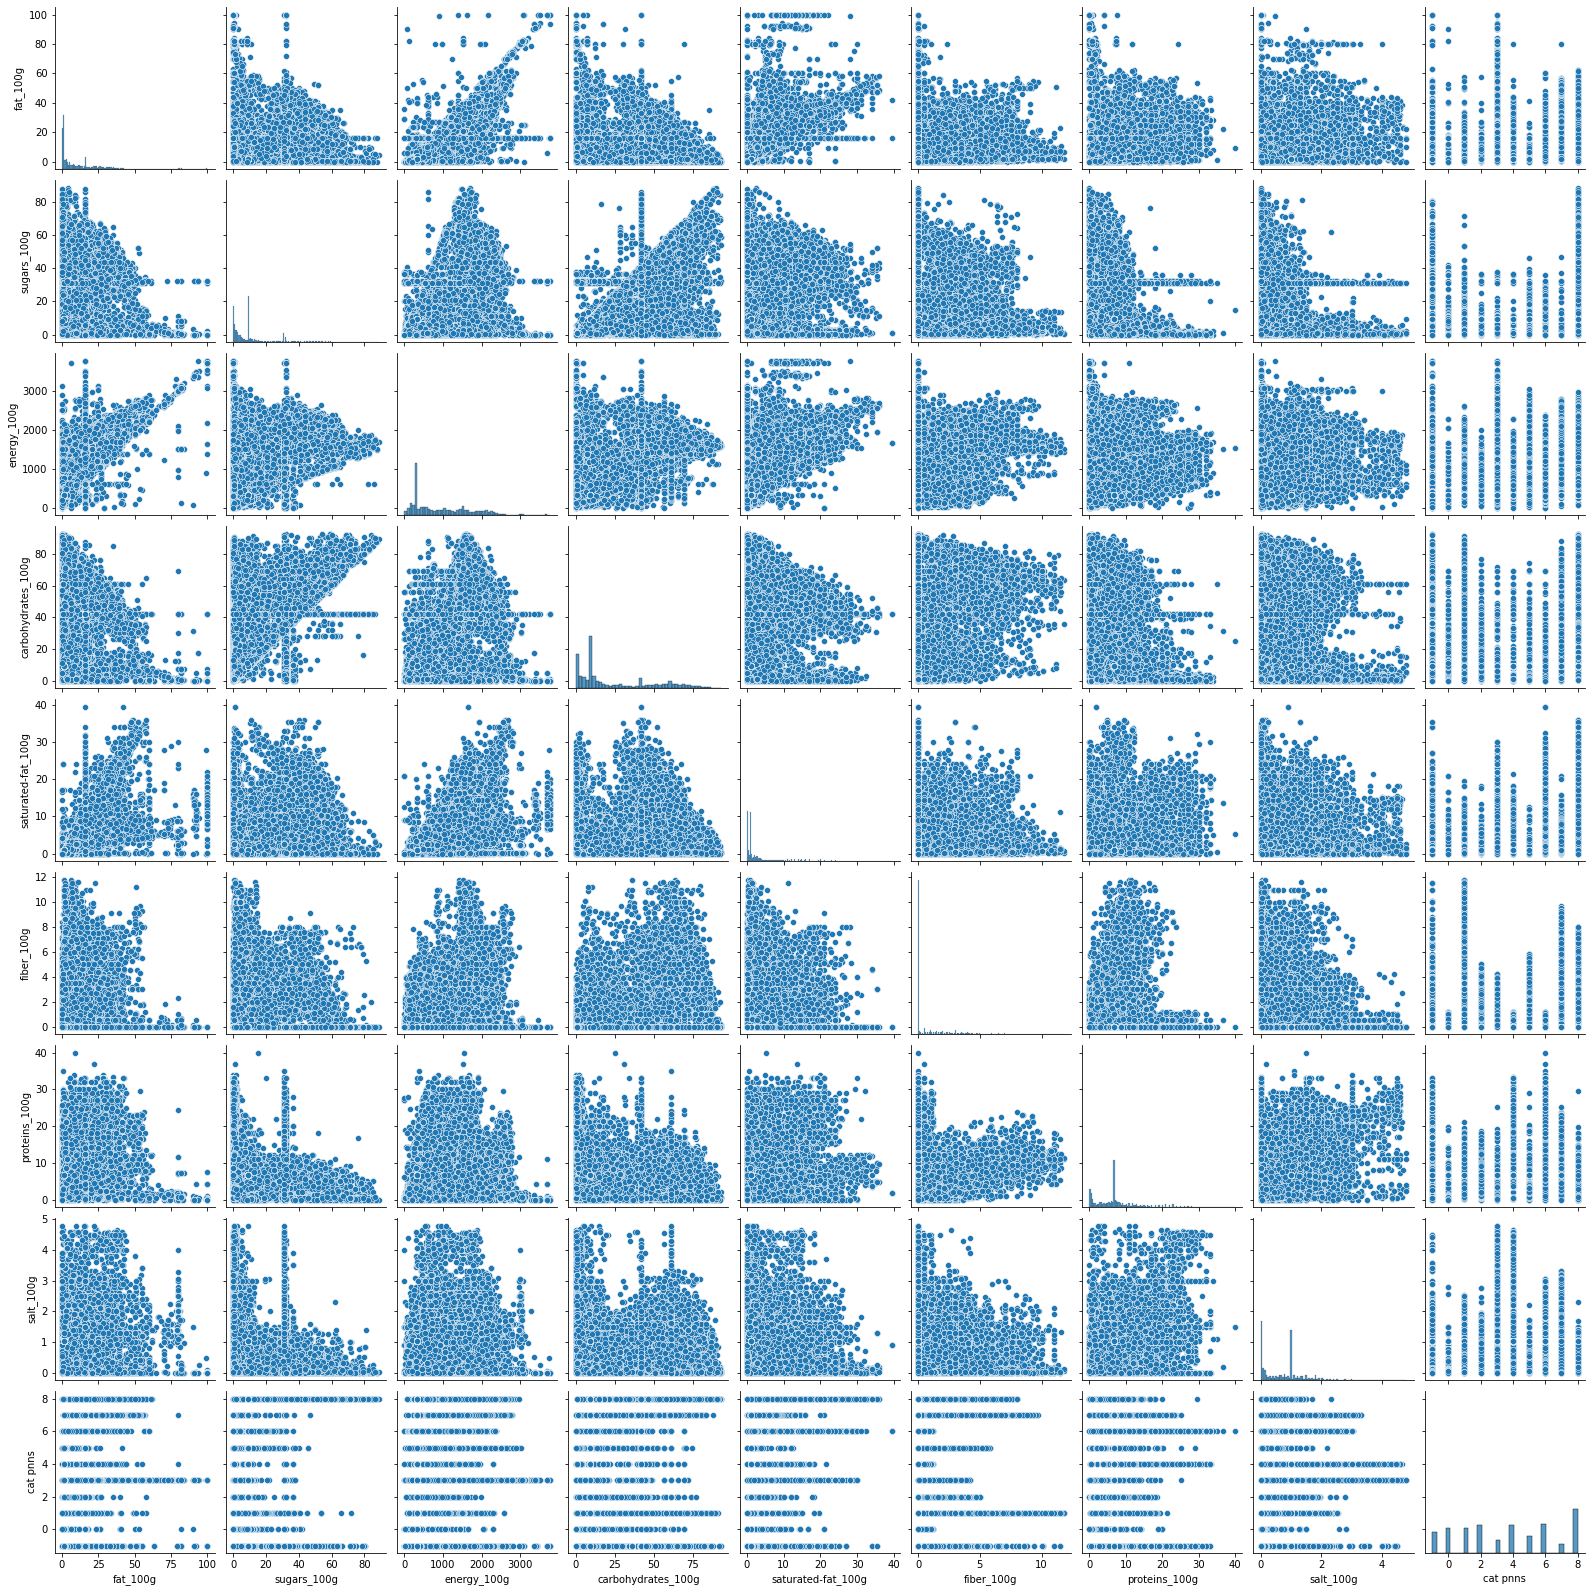

In [15]:
sns.pairplot(df)

In [17]:
# les moyennes des nutrition_grade par features
df_gb = df.groupby(["nutrition_grade_fr"]).mean()
df_gb

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  \
nutrition_grade_fr                                                            
A                    2.972003     4.434856   710.809148           27.601172   
B                    6.649181     9.729730   674.796435           19.403548   
C                    5.343325     8.950690   577.415053           16.461326   
D                   18.122256    14.465070  1343.624563           30.438087   
E                   27.210409    27.419732  1879.877108           40.828555   

                    saturated-fat_100g  fiber_100g  proteins_100g  salt_100g  \
nutrition_grade_fr                                                             
A                             0.618598    2.259215       6.931197   0.326903   
B                             1.266948    0.709553       6.620507   0.480189   
C                             1.616591    0.531341       6.967808   0.859426   
D                             6.948881    0.837452       8.796358   0.931361   
E                            11.971753    0.941295       7.594390   0.854716   

                    cat pnns  
nutrition_grade_fr            
A                   2.507738  
B                   3.001929  
C                   3.194110  
D                   4.508313  
E                   5.711961

#### Nutrition grade _ fat_100g

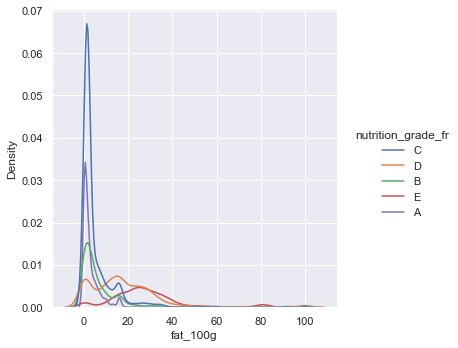

In [18]:
sns.displot(data=df, x="fat_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

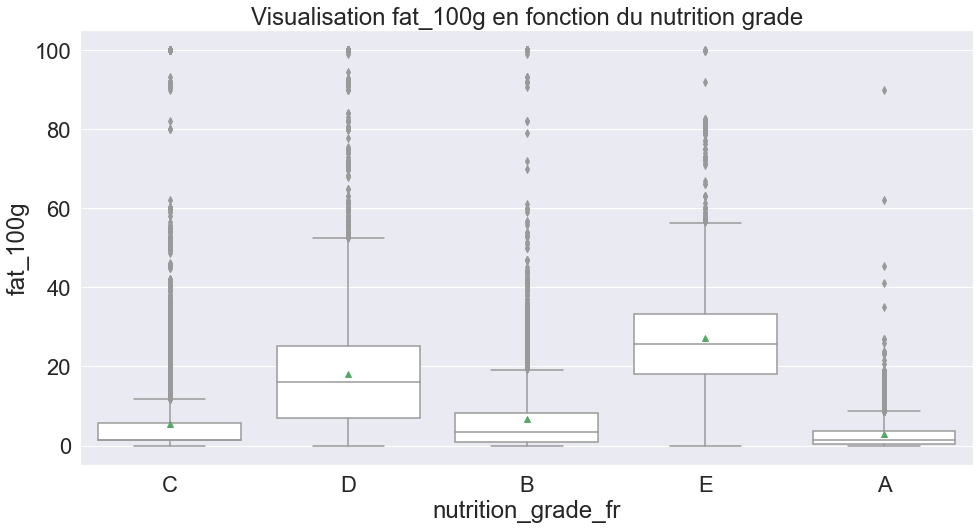

In [19]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fat_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ sugars_100g

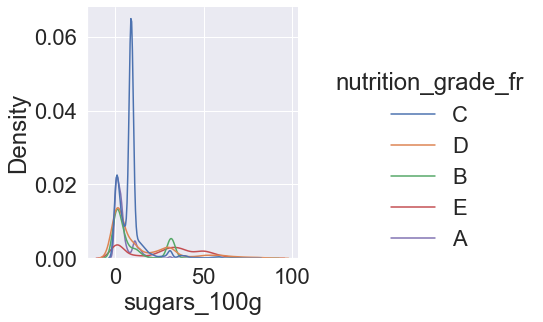

In [20]:
sns.displot(data=df, x="sugars_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

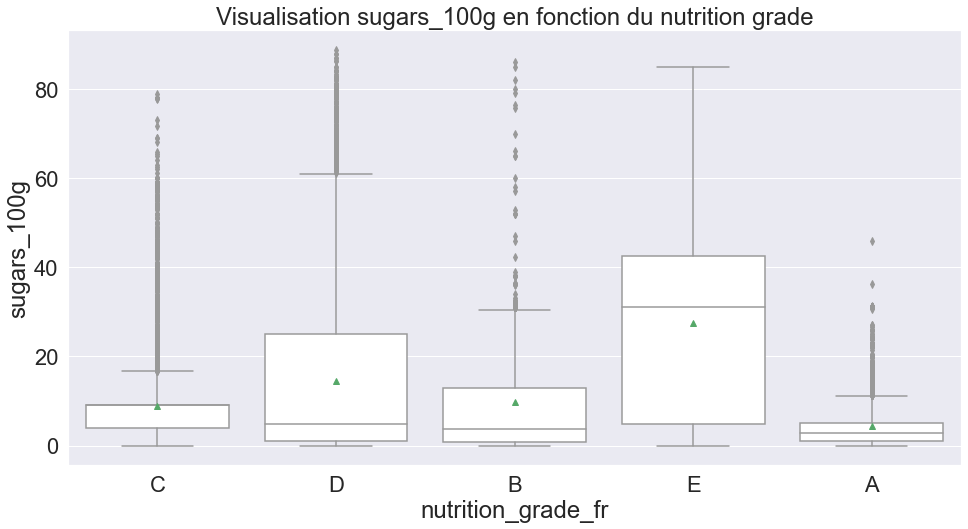

In [21]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="sugars_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation sugars_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ energy_100g

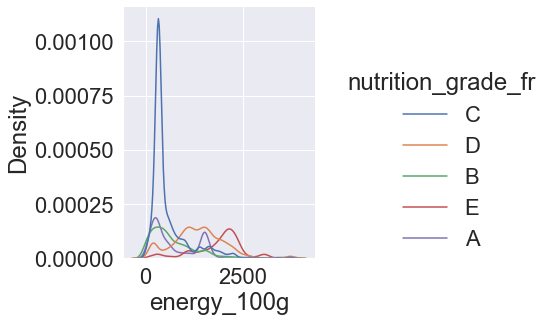

In [22]:
sns.displot(data=df, x="energy_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

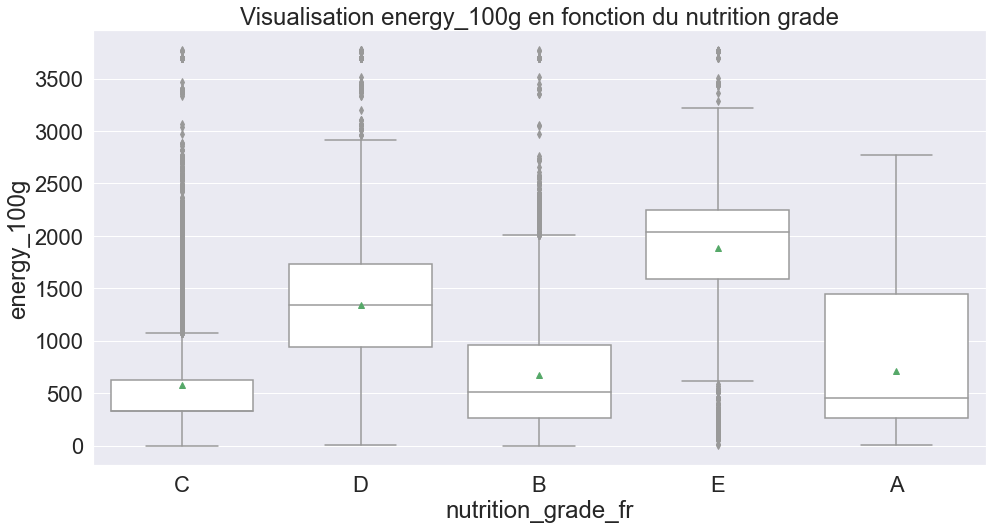

In [23]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="energy_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation energy_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ carbohydrates_100g

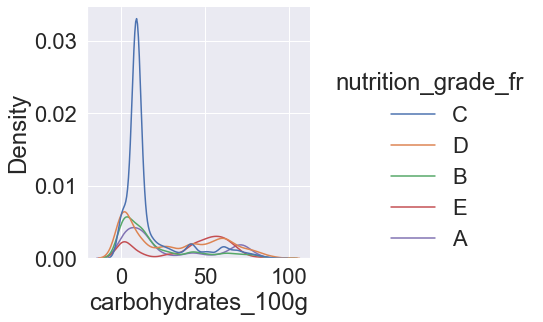

In [24]:
sns.displot(data=df, x="carbohydrates_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

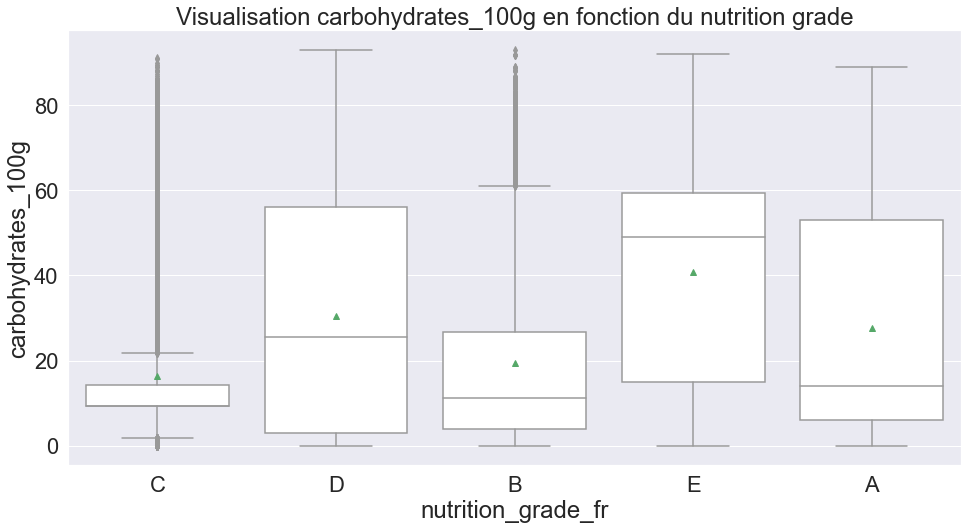

In [25]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="carbohydrates_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation carbohydrates_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ saturated-fat_100g

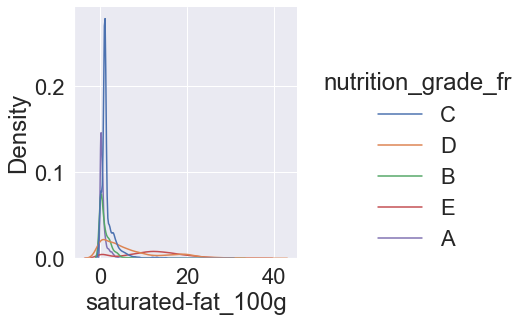

In [26]:
sns.displot(data=df, x="saturated-fat_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

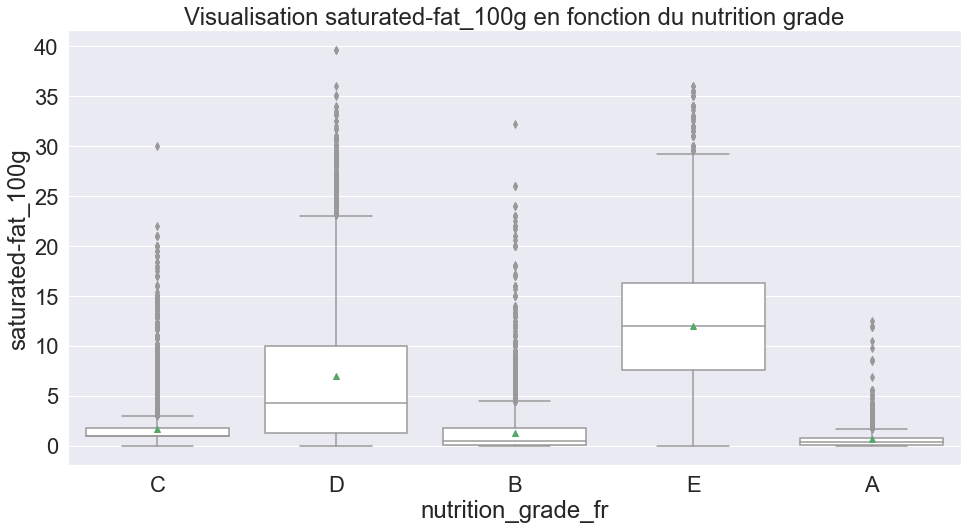

In [27]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="saturated-fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation saturated-fat_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ fiber_100g 

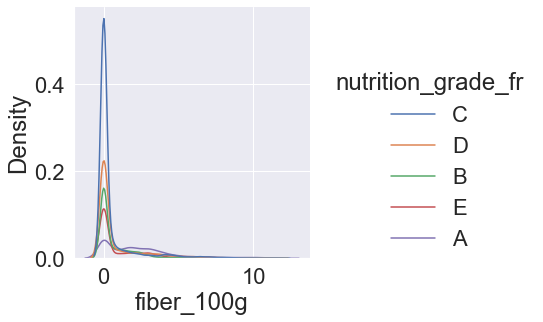

In [28]:
sns.displot(data=df, x="fiber_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

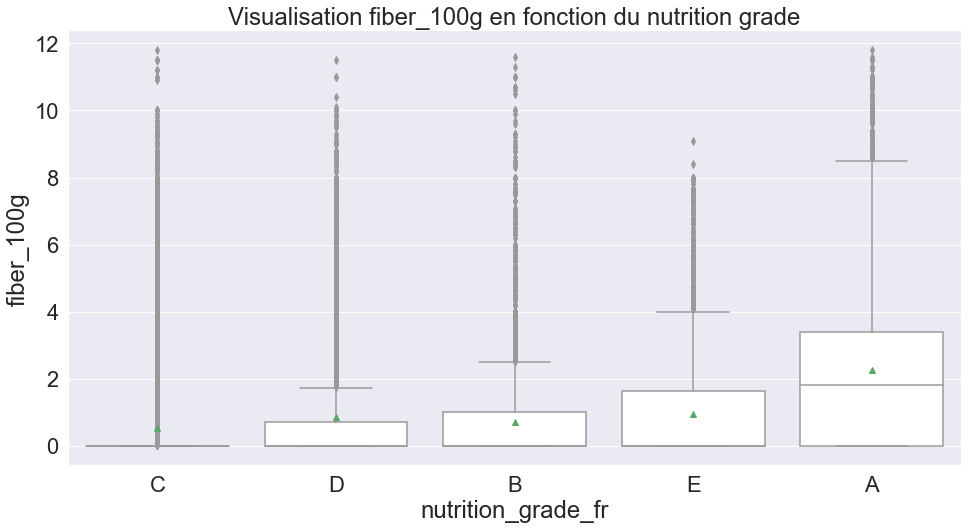

In [29]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="fiber_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fiber_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ proteins_100g   

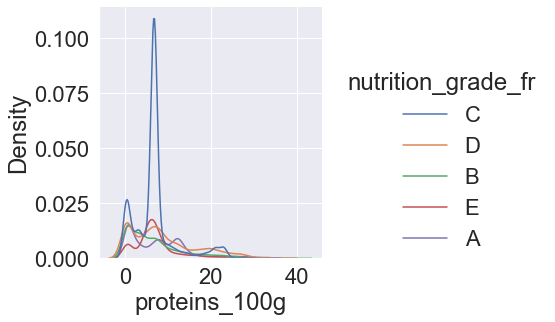

In [30]:
sns.displot(data=df, x="proteins_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

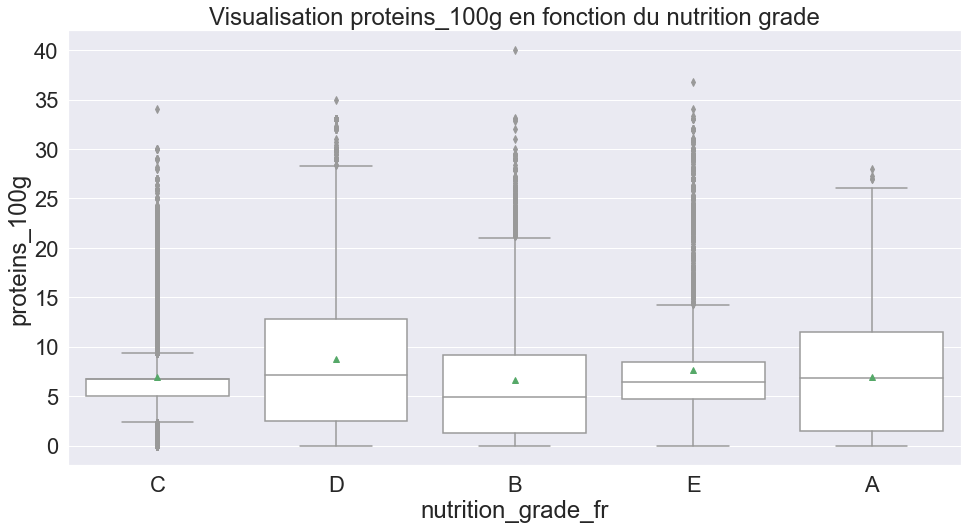

In [31]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="proteins_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation proteins_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ salt_100g 

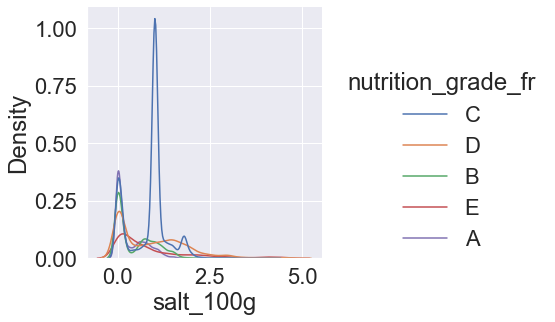

In [32]:
sns.displot(data=df, x="salt_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

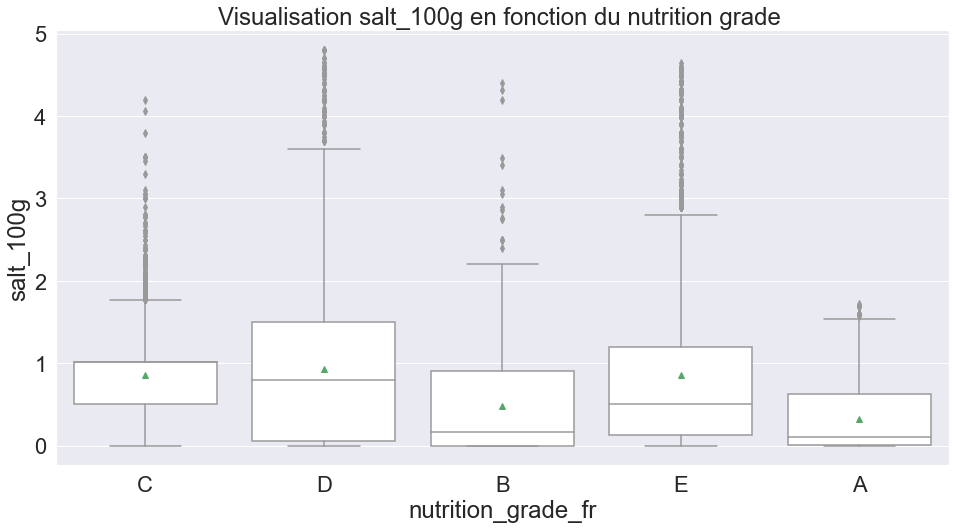

In [33]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="salt_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation salt_100g en fonction du nutrition grade ")
plt.show()

In [34]:
df = df[['product_name','fat_100g', 'sugars_100g', 'energy_100g',
       'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g','nutrition_grade_fr']]

## Normalisation

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

df_norm = df.copy()
df_norm = df_norm.select_dtypes('float')
df_norm = pd.DataFrame(scaler.fit_transform(df_norm), columns=df_norm.columns)
df_norm.head()

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  saturated-fat_100g  \
0 -0.531177    -0.233801    -0.625968           -0.655358           -0.324587   
1 -0.736362    -0.153211    -1.027069           -0.594130           -0.666144   
2 -0.681646     2.956206     0.586757            2.099909           -0.649066   
3  0.241684     1.498876     0.934019            1.410072            0.392681   
4  0.768324     1.351129     1.154759            1.120258           -0.661874   

   fiber_100g  proteins_100g  salt_100g  
0   -0.518972       0.906672   1.731275  
1   -0.518972      -1.113936  -0.987299  
2    2.208866      -1.065441  -0.959646  
3    0.958607      -0.305693  -0.297305  
4   -0.518972      -0.224869  -1.028698

fat_100g


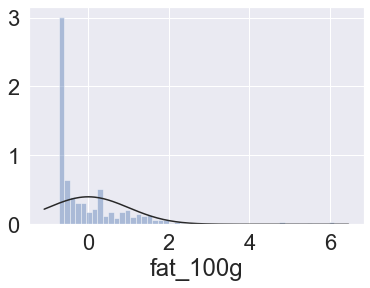

sugars_100g


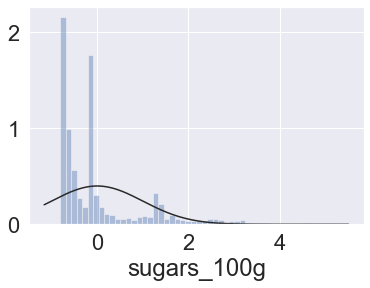

energy_100g


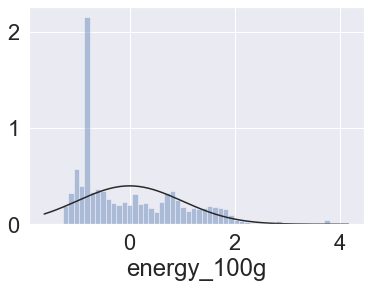

carbohydrates_100g


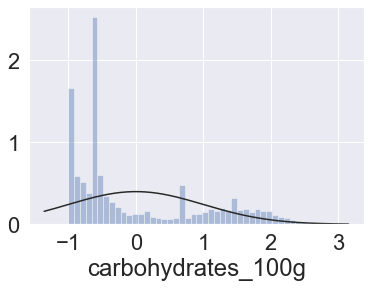

saturated-fat_100g


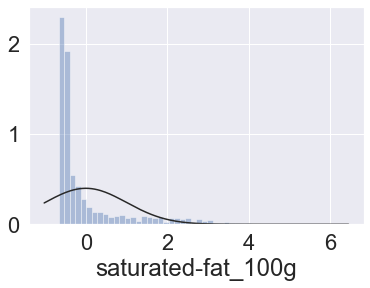

fiber_100g


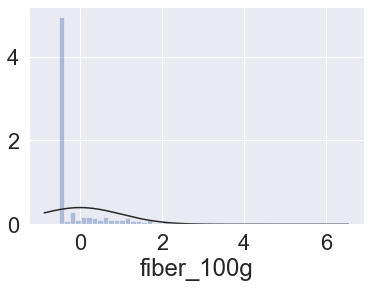

proteins_100g


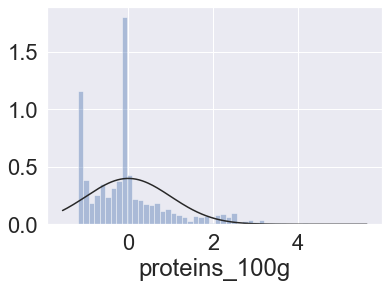

salt_100g


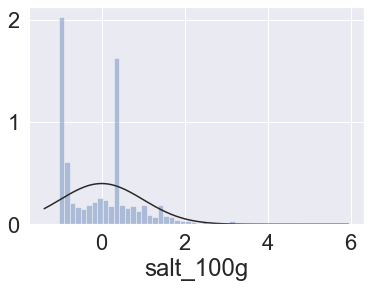

In [37]:
# verification de la distribution gausienne, test de normalité
for col in df_norm.select_dtypes('number'):
    plt.figure()
    sns.distplot(df_norm[col], fit=norm, kde=False)
    print(col)
    plt.show()

fat_100g


<Figure size 432x288 with 0 Axes>

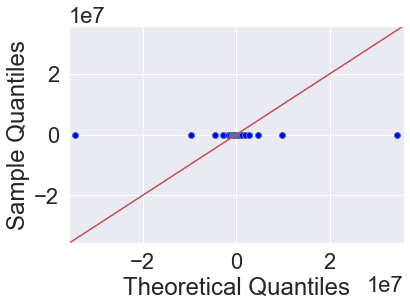

sugars_100g


<Figure size 432x288 with 0 Axes>

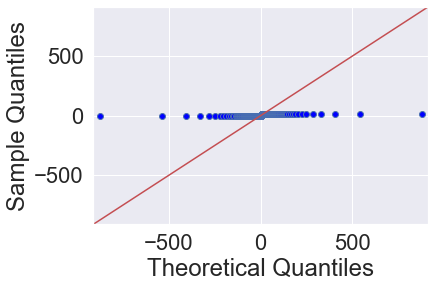

energy_100g


<Figure size 432x288 with 0 Axes>

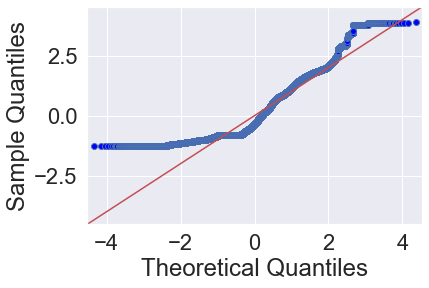

carbohydrates_100g


<Figure size 432x288 with 0 Axes>

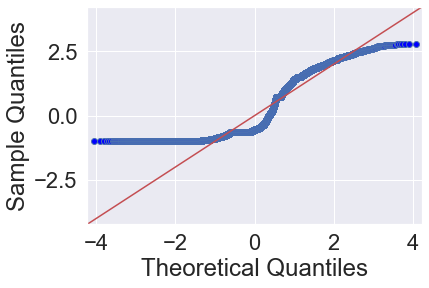

saturated-fat_100g


<Figure size 432x288 with 0 Axes>

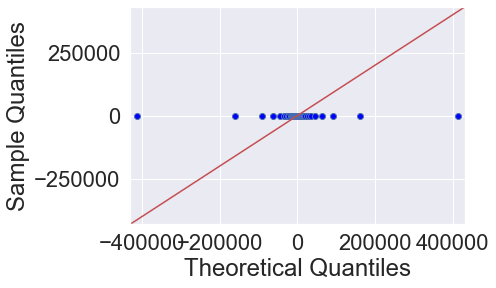

fiber_100g


<Figure size 432x288 with 0 Axes>

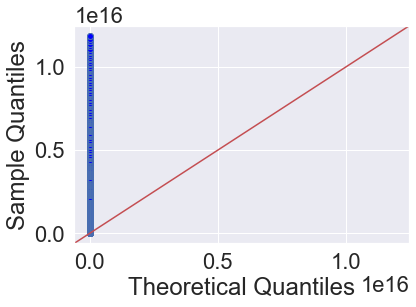

proteins_100g


<Figure size 432x288 with 0 Axes>

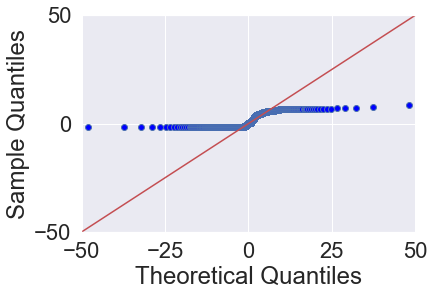

salt_100g


<Figure size 432x288 with 0 Axes>

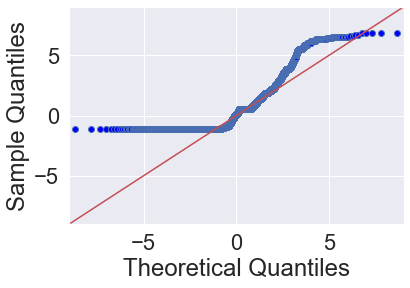

In [38]:
for col in df_norm:
    plt.figure()
    sm.qqplot(df_norm[col], st.t, fit=True, line="45")
    print(col)
    plt.show()

## Tests d'hypothèses 

Nous utiliserons la statistique inférentielle pour interpreter nos données afin d'aquérir une meilleure connaissance

Les tests parametriques :

ANOVA : Comparaison de plusieurs moyennes

Test parametrique ANOVA (puissant pour savoir si nous pouvons oui ou non rejeter H0)

In [39]:
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [40]:
df_nutri_grade = df['nutrition_grade_fr']

In [41]:
df_test = pd.concat([df_norm, df_nutri_grade], axis=1)

In [42]:
df_test

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  \
0     -0.531177    -0.233801    -0.625968           -0.655358   
1     -0.736362    -0.153211    -1.027069           -0.594130   
2     -0.681646     2.956206     0.586757            2.099909   
3      0.241684     1.498876     0.934019            1.410072   
4      0.768324     1.351129     1.154759            1.120258   
...         ...          ...          ...                 ...   
41971 -0.052414    -0.757633    -0.479257           -0.973745   
41972 -0.709004    -0.791212     0.756350            2.279512   
41973 -0.633770    -0.193506    -0.826519           -0.624744   
41974 -0.702165    -0.670328     0.055096            0.712071   
41975 -0.736362    -0.240517    -1.020339           -0.561475   

       saturated-fat_100g  fiber_100g  proteins_100g  salt_100g  \
0               -0.324587   -0.518972       0.906672   1.731275   
1               -0.666144   -0.518972      -1.113936  -0.987299   
2               -0.649066    2.208866      -1.065441  -0.959646   
3                0.392681    0.958607      -0.305693  -0.297305   
4               -0.661874   -0.518972      -0.224869  -1.028698   
...                   ...         ...            ...        ...   
41971           -0.205043   -0.518972       0.745023  -0.587102   
41972           -0.649066    0.049327      -0.111715  -1.010752   
41973           -0.495366   -0.518972      -0.103632   0.371988   
41974           -0.666144   -0.518972      -0.709814  -0.783336   
41975           -0.666144   -0.518972      -1.194760  -0.973499   

      nutrition_grade_fr  
0                      C  
1                      C  
2                      C  
3                      D  
4                      B  
...                  ...  
41971                  A  
41972                  A  
41973                  C  
41974                  A  
41975                  D  

[41976 rows x 9 columns]

#### Les variables energy_100g d'un produit et le nutriscore

In [43]:
# Hypothèses
# H0: l'hypothèse nulle: Les variables energy_100g d'un produit et le nutriscore obtenu sont indépendantes
# Ha: l'hypothèse alternative: Les variables energy_100g d'un produit et le nutriscore obtenu sont corrélées

In [44]:
linear_model = ols('energy_100g ~ C(nutrition_grade_fr)', data=df_test).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
# Afficher les résultats de la table d'ANOVA
print(table)

                            sum_sq       df            F  PR(>F)
C(nutrition_grade_fr)  16207.86467      4.0  6599.820664     0.0
Residual               25768.13533  41971.0          NaN     NaN


In [45]:
pvalue = linear_model.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue))

Ici la p-value est égale à 0.0


In [46]:
seuil = 0.05
# Conclusion
if pvalue > seuil:
    print("On ne peux pas rejetter H0: il n'y a pas de corrélation")
else:
    print("On rejette H0 : il y a une corrélation")

On rejette H0 : il y a une corrélation


In [47]:
#df.set_index('product_name',inplace=True)

### Analyse en Composantes Principales 

 l'ACP est une méthode statistique qui permet de représenter les données sur un graphique facilement interprétables.

In [48]:
from sklearn.decomposition import PCA
from sklearn import decomposition
from pyensae.graphhelper import Corrplot

In [49]:
Z = df_test.select_dtypes('float')

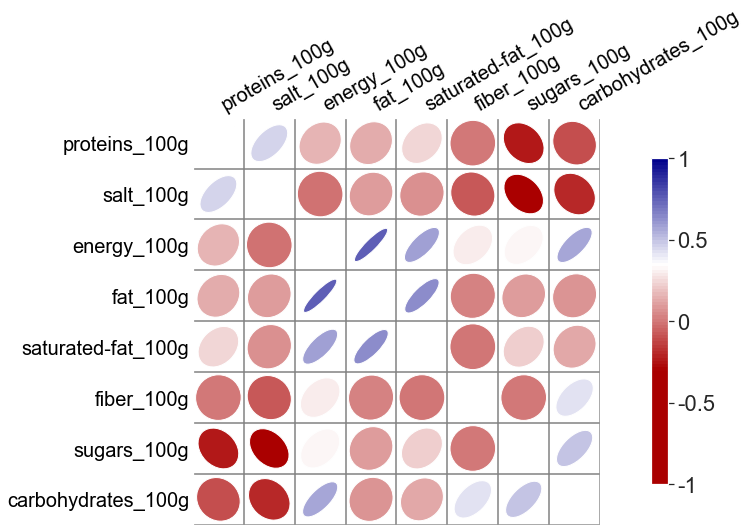

In [50]:
c = Corrplot(Z)
c.plot(figsize=(15,8))
plt.show()

In [59]:
pca = PCA(n_components=4)
Principal_components=pca.fit_transform(Z)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2','PC 3', 'PC 4'])
print(pca_df)

           PC 1      PC 2      PC 3      PC 4
0     -1.164627  1.526186  0.397973 -1.092348
1     -1.629574 -1.156699 -0.808080  0.482659
2      1.818634 -3.678597  1.353253 -1.000855
3      1.973696 -1.356629  0.487790 -0.544931
4      1.460843 -1.383873 -0.618223 -0.517209
...         ...       ...       ...       ...
41971 -1.000618  0.723935 -0.393231  0.422525
41972  0.498751 -1.436176  1.124825 -0.039138
41973 -1.397101  0.184744 -0.205053 -0.304844
41974 -0.634030 -1.044842 -0.003118  0.247905
41975 -1.646186 -1.168808 -0.795297  0.548648

[41976 rows x 4 columns]


In [60]:
for_visual = pd.concat([pca_df, df['nutrition_grade_fr']], axis = 1)
print(for_visual)

           PC 1      PC 2      PC 3      PC 4 nutrition_grade_fr
0     -1.164627  1.526186  0.397973 -1.092348                  C
1     -1.629574 -1.156699 -0.808080  0.482659                  C
2      1.818634 -3.678597  1.353253 -1.000855                  C
3      1.973696 -1.356629  0.487790 -0.544931                  D
4      1.460843 -1.383873 -0.618223 -0.517209                  B
...         ...       ...       ...       ...                ...
41971 -1.000618  0.723935 -0.393231  0.422525                  A
41972  0.498751 -1.436176  1.124825 -0.039138                  A
41973 -1.397101  0.184744 -0.205053 -0.304844                  C
41974 -0.634030 -1.044842 -0.003118  0.247905                  A
41975 -1.646186 -1.168808 -0.795297  0.548648                  D

[41976 rows x 5 columns]


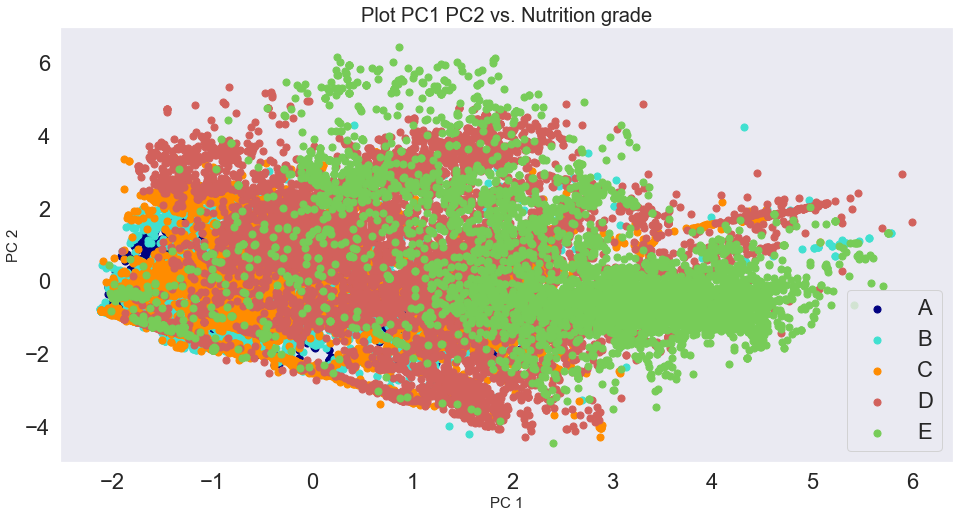

In [61]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot PC1 PC2 vs. Nutrition grade', fontsize = 20)
nutrition_grade = ['A','B','C','D','E']
colors = ['navy', 'turquoise', 'darkorange', '#d2615c', '#77cc58']
for nutrition_grade_fr, color in zip(nutrition_grade,colors):
    indicesToKeep = for_visual['nutrition_grade_fr'] == nutrition_grade_fr
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(nutrition_grade)
ax.grid()

### Diagramme éboulis des valeurs propres
Les pourcentages d’inertie nous donnent une information sur la « structure » de nos données.

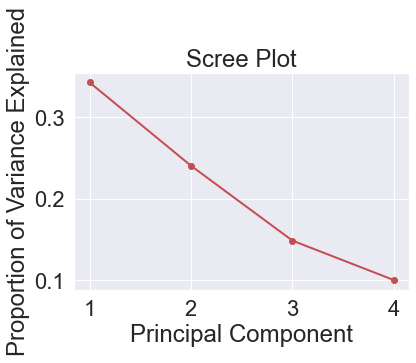

In [62]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [63]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.34251569 0.24025843 0.14841127 0.10003251]
Cumulative Prop. Variance Explained:  [0.34251569 0.58277413 0.7311854  0.83121791]


Les 4 premières composantes expliquent 83% de la variance totale des données. On peut donc dire que la dimension intrasèques de cet ensemble de données est raisonnablement égale à 4. Transformons donc la dataframe originelle en une dataframe de 4 variables

In [66]:
 def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7, 6))

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center',
                                 va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('PC{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('PC{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (PC{} et PC{})".format(d1+1, d2+1))
            plt.show(block=False)

In [67]:
features = df_test.columns
features

Index(['fat_100g', 'sugars_100g', 'energy_100g', 'carbohydrates_100g',
       'saturated-fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'nutrition_grade_fr'],
      dtype='object')

<Figure size 1152x1152 with 0 Axes>

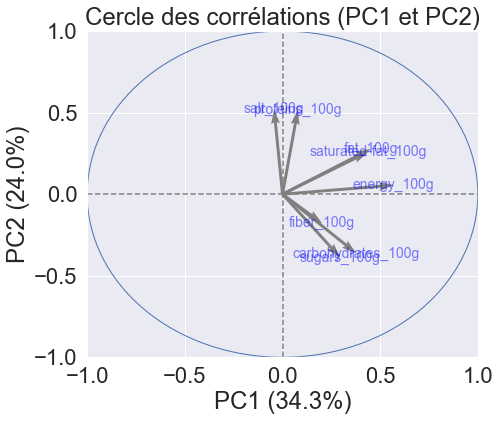

In [68]:
n_comp = 3
pcs = pca.components_
fig = plt.figure(figsize=(16, 16))
display_circles(pcs, n_comp, pca, [
                (0, 1), (2, 3), (4, 5)], labels=np.array(features))